In [1]:
from random import random
from random import seed
from math import exp

#pick up the architecure of the Network
def initialize_network(n_inputs,n_hidden,n_outputs):
    network=list()
    #hidden layer
    hidden_layer=[{'weights':[random() for i in range(n_inputs+1)]} for j in range(n_hidden)]#list of dicts
    network.append(hidden_layer)
    
    #output layer
    output_layer=[{'weights':[random() for i in range(n_hidden+1)]} for j in range(n_outputs)]
    network.append(output_layer)
    
    return network
    

In [2]:
XOR_data= [[0,0,0],
          [0,1,1],
          [1,0,1],
          [1,1,0]]

dataset = [[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]]

n_inputs = len(dataset[0])-1
n_hidden = 3
n_outputs = len(set([row[-1] for row in dataset]))

seed(1)
network=initialize_network(n_inputs,n_hidden,n_outputs)

In [3]:
#Feed Forward the data(X)
def feedforward(network,input_row):
    row=input_row
    for layer in network:
        next_input=[]
        for neuron in layer:
            result=multiply(neuron['weights'],row)
            result=activate_sigmoid(result)
            neuron['output']=result
            next_input.append(neuron['output'])
        row=next_input
    
    return row

In [4]:
def multiply(weights,input_row):
    result=weights[-1]
    
    for i in range(len(input_row)):
        result+= weights[i]*input_row[i]
    return result

In [5]:
def activate_sigmoid(value):
    compressed_value= 1/(1+exp(-value))
    return compressed_value

In [12]:
def backpropagate(network,expected):
    
    
    for i in reversed (range(len(network))):
        
        layer=network[i]
        errors=list()
            
        if i == len(network)-1:
            #for output layer
            
            for j in range(len(layer)):
                neuron=layer[j]
                error=expected[j]-neuron['output']
                errors.append(error)
               
        else:
            #for hidden layer
            
            for j in range(len(layer)):
                herror=0
                nextlayer=network[i+1]
                for neuron in nextlayer:
                    herror+=(neuron['weights'][j]*neuron['delta'])
                    
                errors.append(herror)
        
        #delta values
        for j in range(len(layer)):
            neuron=layer[j]
            neuron['delta']=errors[j]*sigmoidDerivative(neuron['output']) 
            

In [7]:
def sigmoidDerivative(output):
    return output*(1.0-output)

In [8]:
def updateWeights(network,input,lrate):
    for i in range(len(network)):
        inputs = input[:-1]
        if i!=0:
            inputs=[neuron['output'] for neuron in network[i-1]]
            
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j]+=lrate*neuron['delta']*inputs[j]
                
            neuron['weights'][-1] += lrate * neuron['delta']

In [13]:
#Train the network
import matplotlib.pyplot as plt
import numpy as np
l=np.arange(100)
def train(network,data,lrate,epochs):
    
    errors=list()
    for epoch in range(epochs):
        error=0
        for row in data:
            feed_result=feedforward(network,row)
            
            expected=[0.0 for i in range(n_outputs)]
            expected[row[-1]]=1
            error+=sum([(expected[j]-feed_result[j])**2 for j in range(len(expected))])
            
            backpropagate(network,expected)
            updateWeights(network,row,lrate)
                
        print('>epoch=%d,error=%.3f'%(epoch,error))
        errors.append(error)
    
    
    plt.plot(l,errors,marker='o')
    plt.show()
            
        
        

>epoch=0,error=6.892
>epoch=1,error=5.753
>epoch=2,error=5.342
>epoch=3,error=5.382
>epoch=4,error=5.425
>epoch=5,error=5.440
>epoch=6,error=5.441
>epoch=7,error=5.436
>epoch=8,error=5.425
>epoch=9,error=5.399
>epoch=10,error=5.332
>epoch=11,error=5.186
>epoch=12,error=4.990
>epoch=13,error=4.780
>epoch=14,error=4.534
>epoch=15,error=4.248
>epoch=16,error=3.934
>epoch=17,error=3.608
>epoch=18,error=3.283
>epoch=19,error=2.969
>epoch=20,error=2.674
>epoch=21,error=2.400
>epoch=22,error=2.147
>epoch=23,error=1.916
>epoch=24,error=1.706
>epoch=25,error=1.517
>epoch=26,error=1.349
>epoch=27,error=1.202
>epoch=28,error=1.074
>epoch=29,error=0.964
>epoch=30,error=0.870
>epoch=31,error=0.788
>epoch=32,error=0.718
>epoch=33,error=0.656
>epoch=34,error=0.603
>epoch=35,error=0.557
>epoch=36,error=0.516
>epoch=37,error=0.479
>epoch=38,error=0.447
>epoch=39,error=0.419
>epoch=40,error=0.393
>epoch=41,error=0.370
>epoch=42,error=0.349
>epoch=43,error=0.330
>epoch=44,error=0.313
>epoch=45,error=0.29

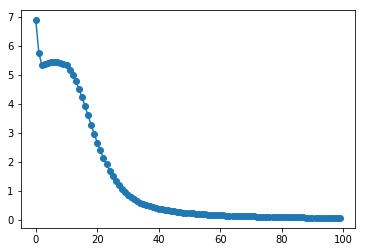

In [14]:
train(network, dataset, 0.5, 100)

In [15]:
# Make a prediction with a network
def predict(network, row):
    outputs = feedforward(network, row)
    return outputs.index(max(outputs))

In [16]:
for row in dataset:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))



Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
